# Do our “meetupers” provide extra mobility predictability for us?

*Updated: 24 March 2020*

**By Zexun Chen (sxtpy2010@gmail.com)**

All the algorithms are released on the GitHub, please refer to Github repo [social-predictability](https://github.com/Magica-Chen/social-predictability) if you're interested.

Everyday we will meet up many people in various places. Although some  of the people we met are our friends, or at least, we know each other, a larges percentage of individuals are our “meetupers” who just visit the same locations as us at the same time.

As  we know, friendship as social information, is probably useful to provide extra information of ourselves. Unfortunately,  we may have difficulties in collecting actual and accurate friendship network for an individual due to privacy policy and ambiguous definition of friendship. Nowadays, with the development digital technology, we have more digital check-ins using mobile phone. The check-ins datasets usually contain our basic information, for example, username or user ID, location or place ID, and check-in time.  Based on these check-in information, it is not difficult to extract the “meetupers” information for every users. Consequently, the question you probably ask, 

***do our “meetupers” provide more mobility predictability for us?*** 

To answer this question, we will start our experiment on a public human mobility dataset.

## Dataset

### Data description

> ***Weeplace dataset***: a data visualisation application that allows users to visualise their check-ins on other LBSNs. Our data include more than 7 million check-ins produced by more than 15,000 Foursquare users visiting over 1 million locations in approximately 50,000 cities worldwide from Nov 2003 to Jun 2011. At the time the data was collected, users manually checked in to locations in order to earn points,  badges, and titles (e. q., "mayor") at locations they frequented, including their own homes. Foursquare also had hundreds of thousands of local businesses partners who offered incentives for checking in, such as discounts and free food. Together, these features incentivised frequent check-ins. The data we use here corresponds to the Foursquare users who have provided their data to the Weeplace service (now defunct) in order to create dynamic visualisations of their activities.

In [1]:
import numpy as np
import pandas as pd
%load_ext autoreload
%autoreload 2

In [2]:
df_raw = pd.read_csv('data/weeplace_checkins.csv')

In [3]:
Nr_record = df_raw.shape[0]
Nr_user = len(set(df_raw['userid'].tolist()))
Name_col = list(df_raw.columns)
Nr_col = len(Name_col)

In this raw dataset, there are ***{{Nr_col}}*** attributes, including ***{{Name_col}}***. There are totally ***{{Nr_record}}*** records from ***{{Nr_user}}*** users, averagely ***{{Nr_record / Nr_user}}*** records per user. The details of how many records each user has are shown in the below:

In [4]:
df_raw.groupby('userid')['datetime'].count().reset_index(name='count')['count'].describe()

count    15799.000000
mean       484.737515
std        530.819991
min          1.000000
25%        147.000000
50%        329.000000
75%        638.000000
max       7338.000000
Name: count, dtype: float64

### Data pre-process

Since our definition of "meetup" is based on userid, placeid, and datetime, we should remove any records with incomplete attributes.

In [5]:
df_wp = df_raw.dropna(subset=['userid', 'placeid', 'datetime'])
Np_record = df_wp.shape[0]
Np_user = len(set(df_wp['userid'].tolist()))

In this processed dataset, There are totally ***{{Np_record}}*** records from ***{{Np_user}}*** users, averagely ***{{Np_record / Np_user}}*** records per user. The details of how many records each user has are shown in the below:

In [6]:
df_wp.groupby('userid')['datetime'].count().reset_index(name='count')['count'].describe()

count    15793.000000
mean       466.644209
std        509.988549
min          1.000000
25%        138.000000
50%        316.000000
75%        621.000000
max       7338.000000
Name: count, dtype: float64

## Find all "meetupers" for the whole dataset

> **Definition 1 (meetuper)**: Given a user $A$, any one who has at least one same check-in record of placeid with the user $A$ at the same time, is defined as $A$'s "meetuper". Mathmatically speaking, given the user $A$ and temporal placeid function $L_t(\cdot)$, any user $B$ is called as user $A$'s meetuper if and only if the number of times of placeid sequence $N(A, B)$ no smaller than 1, $$ N(A, B) = N(B, A) = \{t \in T | L_t(A) = L_t(B) \} \geq 1,$$
where $T$ is the timestamp of all the dataset. Since $N(A, B)$ is symmetric, user $A$ is also called as a meetuper of user $B$.

**Remark 1**: for numerical computation, we remove minutes and seconds information of datetime, thus here "at same time" means at the same hour-based time slot.

In order to obtain all users' meetupers, we devised a Meetup and MeetupStrategy with several functions. Please refer to `meetup_strategy.py`. Specifically, for finding all meetupers and their temporal placeids, please refers to `find_meetup()` and `all_meetup` in the class Meetup. The useful code is: 

```python
import meetup_strategy as ms
LetMeet = ms.Meetup(path='data/weeplace_checkins.csv')
user_meetup = LetMeet.all_meetup()   # it will cost a long time
user_placeidT = LetMeet.temporal_placeid() # it will cost a long time
```

In order to show the results quickly, we just import our all results here and define a MeetupStategy directly.

In [7]:
# This is only to show our results quickly
import pickle

# import meetup_store
pickle_in = open("results/meetup_store.pickle", "rb")
meetup_store = pickle.load(pickle_in)
pickle_in.close()

# concat as a dataframe
user_meetup = pd.concat(meetup_store)
user_meetup = user_meetup.rename(columns={'count': 'meetup'})

## import users' temporal placeid
pickle_in = open("results/user_placeidT.pickle", "rb")
user_placeidT = pickle.load(pickle_in)
pickle_in.close()

user_stats = pd.read_csv('results/user-meetup-info.csv')
ego_stats = pd.read_csv('results/user-ego-info.csv')

user_stats_tr = pd.read_csv('results/user-meetup-info-tr.csv')
ego_stats_tr = pd.read_csv('results/user-ego-info-tr.csv')

user_stats_sr = pd.read_csv('results/user-meetup-info-sr.csv')
ego_stats_sr = pd.read_csv('results/user-ego-info-sr.csv')

user_stats_all = pd.read_csv('results/user-meetup-info-all.csv')
ego_stats_all = pd.read_csv('results/user-ego-info-all.csv')

In [8]:
import meetup_strategy as ms
FastMeetup = ms.MeetupStrategy(path='data/weeplace_checkins.csv',
                               user_meetup=user_meetup,
                               placeidT=user_placeidT,
                               user_stats=user_stats,
                               ego_stats=ego_stats,
                               tr_user_stats=user_stats_tr,
                               tr_ego_stats=ego_stats_tr,
                               sr_user_stats=user_stats_sr,
                               sr_ego_stats=ego_stats_sr,
                               user_stats_all=user_stats_all,
                               ego_stats_all=ego_stats_all)

Now, all of our results are included in this object **`FastMeetup`**, all the results will be shown from this object.

### Descriptive statistics of Meetupers

In [9]:
Nm_user = len(set(FastMeetup.user_meetup['userid_x'].tolist()))

There are **{{Nm_user}}** (out of total **{{Np_user}}**) who have at least one meetuper. The descriptive statistics are in the below:

In [10]:
FastMeetup.user_meetup.groupby('userid_x')['meetup'].sum().reset_index(name='meetupers')['meetupers'].describe()

count    14327.000000
mean        91.303692
std        181.843077
min          1.000000
25%          7.000000
50%         27.000000
75%         88.000000
max       3045.000000
Name: meetupers, dtype: float64

There are **25%** users have **{{FastMeetup.user_meetup.groupby('userid_x')['meetup'].sum().reset_index(name='meetupers')['meetupers'].describe()['75%']}}** meetupers, **50%** users have **{{FastMeetup.user_meetup.groupby('userid_x')['meetup'].sum().reset_index(name='meetupers')['meetupers'].describe()['50%']}}** meetupers, and **75%** users have **{{FastMeetup.user_meetup.groupby('userid_x')['meetup'].sum().reset_index(name='meetupers')['meetupers'].describe()['25%']}}** meetupers.

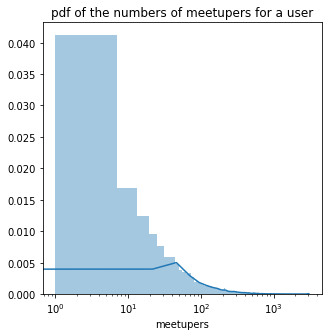

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(5, 5))
sns.distplot(FastMeetup.user_meetup.groupby('userid_x')['meetup'].sum().reset_index(name='meetupers')['meetupers'], 
             bins=500)
ax.set_xscale('log')
plt.title('pdf of the numbers of meetupers for a user')
plt.show()

Let's see more details about meetupers.

### How much information do the users with meetupers have?

We extract the unique placeids for the users have meetupers, and use `log2` function on the length of unique placeids to estiamte the information (bit) these users have. 

> **Definition 2 (user's information)**:  Given a user $A$ and his/her length of unique of placeid $U(A)$, the user's information is defined as $I(A) = log_2(U(A))$. 

Let's see some statistics of the information users have:

In [12]:
FastMeetup.ego_stats['ego_info'].describe()

count    14327.000000
mean         6.969010
std          1.327390
min          0.000000
25%          6.209453
50%          7.087463
75%          7.894818
max         11.270295
Name: ego_info, dtype: float64

There are **25%** users with meetupers have **{{FastMeetup.ego_stats['ego_info'].describe()['75%']}}** bits, **50%** users with meetupers have **{{FastMeetup.ego_stats['ego_info'].describe()['50%']}}** bits, and **75%** users with meetupers have **{{FastMeetup.ego_stats['ego_info'].describe()['25%']}}** bits. The distribution of $I(A)$ is shown in the histogram:

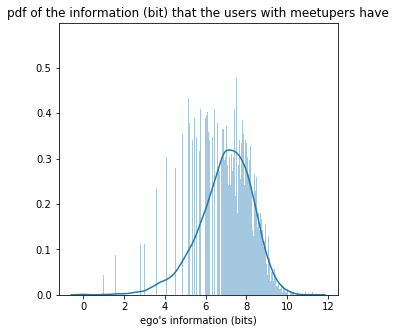

In [13]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.distplot(FastMeetup.ego_stats['ego_info'], 
             bins=1000)
plt.title('pdf of the information (bit) that the users with meetupers have')
plt.xlabel('ego\'s information (bits)')
plt.show()

### For each user, how much information do his/her meetupers have?


> **Definition 3 (alter's information given a ego)**: Given an ego $A$ and his/her meetuper $B \in \mathcal{M}(A)$ with the length of unique of placeid of $U_A(B)$, the alter's information given ego $A$ is defined as $$I_A(B) = log_2(U_A(B)), \forall B \in \mathcal{M}(A),$$ 
where $\mathcal{M}(A)$ is the set of all meetupers of $A$.

For each user, we can see the average of his/her meetuper's information

In [14]:
FastMeetup.user_stats.groupby('userid_x')['alter_info'].mean()

userid_x
00-a           6.214672
0046aki        5.940961
01             5.767631
0403           6.345705
062            6.594461
                 ...   
zulfan-tm      7.015083
zuntsuku       6.023804
zvi-band       7.695871
zviki-cohen    6.894767
zwilling       8.395238
Name: alter_info, Length: 14327, dtype: float64

**Is there any relationship between user's information and his/her meetupers' information? Let's have a look!**

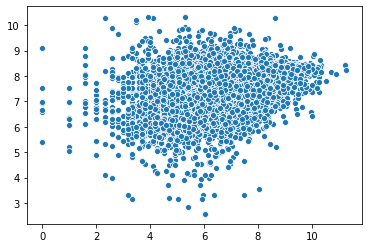

In [15]:
sns.scatterplot(x = FastMeetup.ego_stats['ego_info'].tolist(), 
                y=FastMeetup.user_stats.groupby('userid_x')['alter_info'].mean().tolist())

Unfortunately, it seems hard to find any significant results from this plot.

For a user, he/she may have many meetupers, according to the number of times they meetup with the user, we can have a decreasing sorted meetupers. The most frequent meetuper of the user will be ranked as 1. Consequently, we have a question, **Given a user, do the more frequent meetupers have more information?**

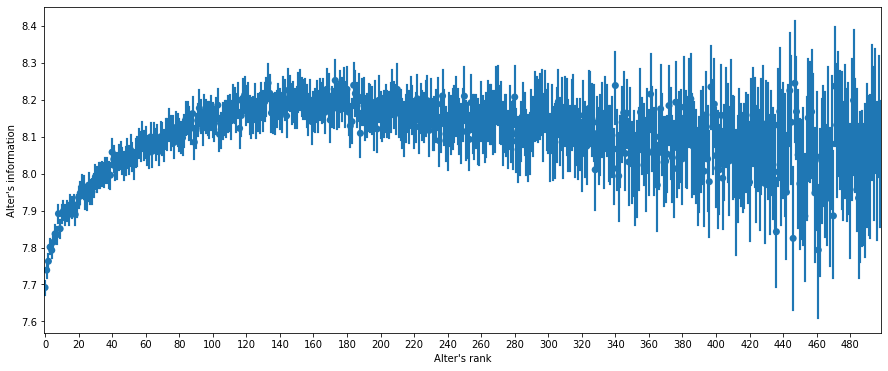

In [16]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.set_context("paper")
sns.pointplot(x="Included Rank", y="alter_info", data=FastMeetup.user_stats[FastMeetup.user_stats['Included Rank'] < 500],
              ci=95, join=False, ax=ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set(xlabel='Alter\'s rank', ylabel='Alter\'s information')
plt.show()

From the view of the figure above, we can see a clear increasing alter's information with the higer ranking before approximate rank=180. That is to say, **given a user, the less frequent meetupers do have more alter's information in general**. The trend can be seen clearly if we focus on small ranks.

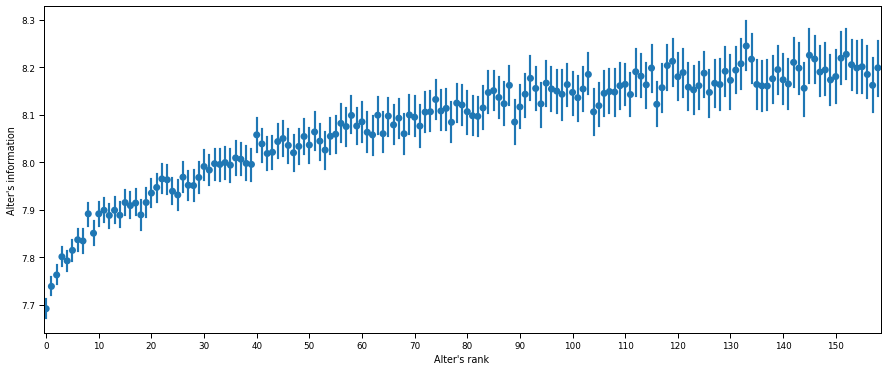

In [17]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.set_context("paper")
sns.pointplot(x="Included Rank", y="alter_info", data=FastMeetup.user_stats[FastMeetup.user_stats['Included Rank'] < 160], \
              ci=95, join=False, ax=ax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.set(xlabel='Alter\'s rank', ylabel='Alter\'s information')
plt.show()

## Build a meetup strategy and check whether  including more alters can provide more predictability

Information theory has been widely-used in estimating the mathematical information human mobility and its  predictability. Notably, information is present not just in the words of the text, but also in their order of appearance. Thus, nonparametric entropy estimator that incorporates the full-sequence structure of trajectories is applied. This estimator has been proved to converge asymptotically to the true entropy (termed as **LZ Entropy**) rate for stationary processes. Furthermore, similar to LZ entropy, cross entropy and cumulative cross are defined in the paper \[1\]

\[1\] Bagrow, James P., Xipei Liu, and Lewis Mitchell. "Information flow reveals prediction limits in online social activity." Nature human behaviour 3.2 (2019): 122-128.

Now let's see the overview of different kinds of entropies in the below (**ego means any user**, and **alter means ego's meetuper**):

### Overview of entropies and predictabilities

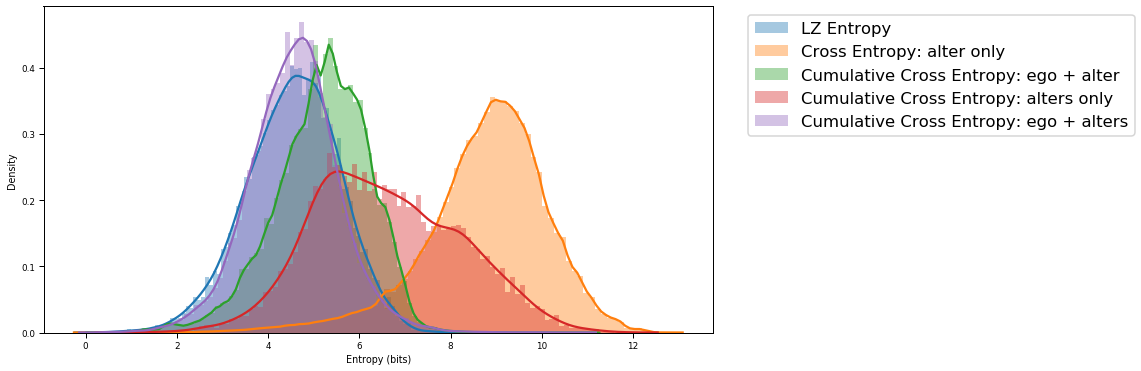

In [18]:
FastMeetup.hist_entropy()

**Remark 2**: LZ Entropy is computed for all egos (as long as his/her trajectory length is over 2). Cross Entropy (alter only) and Cumulative Cross Entropy (ego + alter) are computed for all ego-alter pair (as long as both tranjectories's lengths are over 2).  Cumulative Cross Entropy (alters only) and Cumulative Cross Entropy (ego + alters) are computed for all egos (as long as any of them has trajectory length over 2) and alters means all meetupers included for ego.

Taking advantage of Fano's inequality, we can obtain the limit of predictability given the historical sequence and the entropies above.

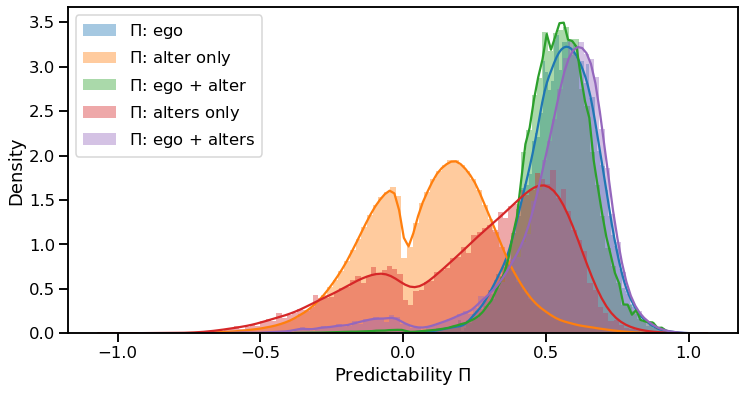

In [19]:
FastMeetup.hist_pred()

**Remark 3**: We can see that there are sometimes negative predictability. This is because the ego's trajactory is too short, but his/her LZ-entropy, cross entropy, cumulative cross entropy is too large, and this case leads to the solver of equation gets nagative root. 
This problem can be probably resolved if we filter ego (e.g., only consider the ego who has trajecotory over 100 locations, currently only require over 2 placeids).

### Estiamtion the cross entropy between ego and his/her most frequent meetuper alter

The cross entropy is always greater than the entropy when the alter provides less information about the ego than the ego, and so an increase in cross-entropy tells us how much information we lose by only having access to the alter’s information instead of the ego’s. Indeed, estimating the cross entropy between ego and his/her most frequent meetuper alter (similar to **Fig. 1b** in the paper of James Bagrow et. al.)

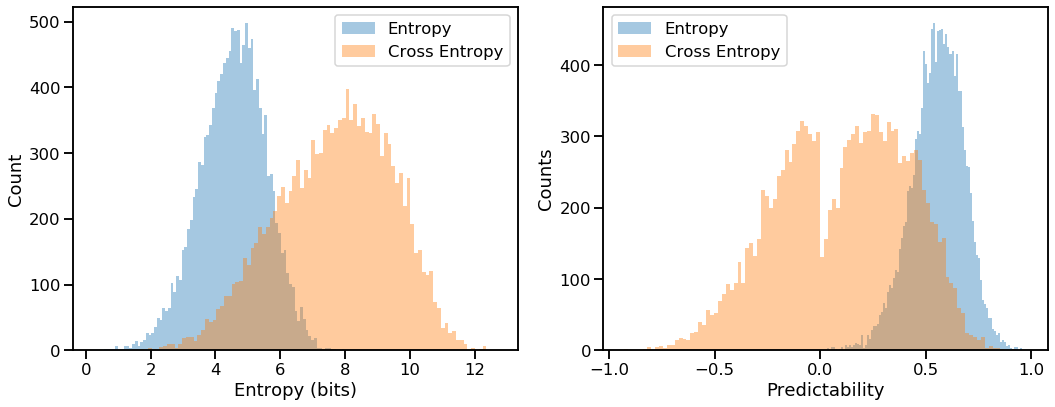

In [65]:
FastMeetup.paper_hist()

The reason why the predictability has negative values refers to the same explanation in **Remark 3**.

### Comparing entropies and predictabilities with the increasing number of included alters

Now we can see the final questions, **is it possible to use alters' historical trajectories to predict ego's future? Is it possible to improve the predictability of ego by adding alters' historical tranjectories?**

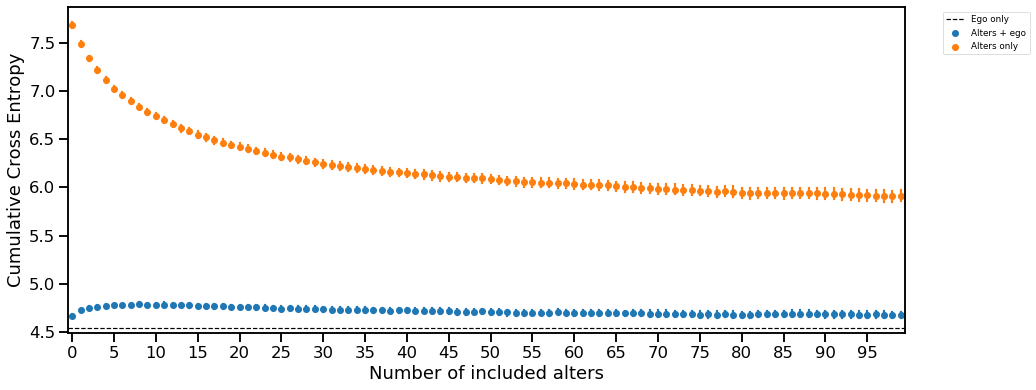

In [21]:
FastMeetup.num_point_plot('entropy', threshold=100, l=15, w=6, mode='paper')

Each point is associated with 95\% confidence interval.

Similarly, we can have the plot for predictability.

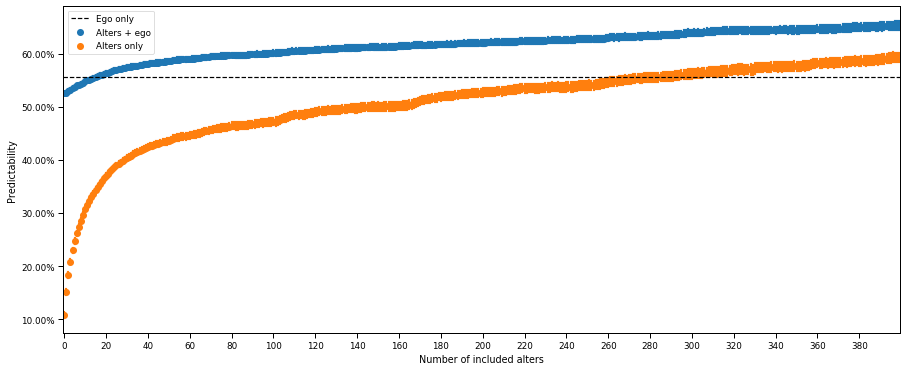

In [22]:
FastMeetup.num_point_plot('predictability', threshold=400, l=15, w=6, mode='paper')

From the view of the figures above, we can see that as more alters were considered, cross-entropy decreased and predictability increased, which is sensible as more potential information is available. Notably, with approximate 260 -- 320 alters, we observed a predictability of the ego given the alters at or above the original predictability of the ego alone, the predictability was significantly greater than that of the ego alone. This indicated that there is potentially more
information about the ego within the total set of alters than within the ego itself.

### Temporal and social control are considered

There are still two issues those can affect the cross-entropy as a measure of information flow. The first is that the predictive information may be due simply to the structure of genearal human trajectories: no matter whose information added, others always can predict us. The second is that of a common cause: egos and alters may be independently visiting same placeid, do not have any impacts on each other. 

To achieve a more scientific result that a meetuper/meetupers’ information provides more predictability for the user himself/herself, we have to make sure that at least, **social control (SC):** adding a meetuper/meetupers’s information can provide more predictability than adding a random user in the dataset, and **temporal control (TC):**, adding a meetuper/meetupers’s specific placeid sequence information can provide more predictability than adding a meetuper/meetupers’s shuffled placeid sequence information.

**Definition 4 (Social control)**: Given a user $A$ and his/her all meetupers $\mathcal{M}(A)$, randomly generate $n_A$ artificial alters (with their true visited placeid sequence) from $\mathcal{D}(A)$, where $n_A$ is the cardinality of $\mathcal{M}(A)$, and $\mathcal{D}(A)$ is the set of all valid users in the dataset except $A$. These artifical alters are considered as the meetupers of $A$ given social control process.

**Definition 5 (Temporal control)**: Given a user $A$ and his/her all meetupers $\mathcal{M}(A)$, for each meetuper $B \in \mathcal{M}(A)$ and his/her time-ordered (from past to now) placeid sequence $L(B) = \{L_{t_i}(B)| t_i \in \mathcal{T}(B), i = 1,2,\cdots, s(B)\} $ where $\mathcal{T}(B)$ is the all timestamps of visited placeids of $B$ and $s(B)$ is the length of placeid sequence of $B$, the temporal control process is defined by applying random permutation operator on $L(B)$, that is, $\sigma(L(B)) = \{L_{\sigma(t_i)}(B)| t_i \in \mathcal{T}(B), i = 1,2,\cdots, U(B)\} $, where $\sigma$ is a random permutation operator.

Based on the definitions above, we can implement our more scientific ideas given both controls.

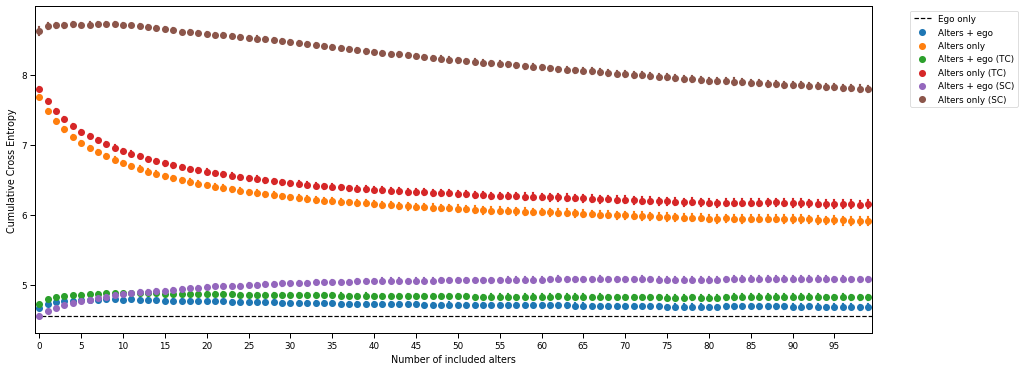

In [62]:
FastMeetup.num_point_plot('entropy', threshold=100, l=15, w=6, mode='paper', control=True)

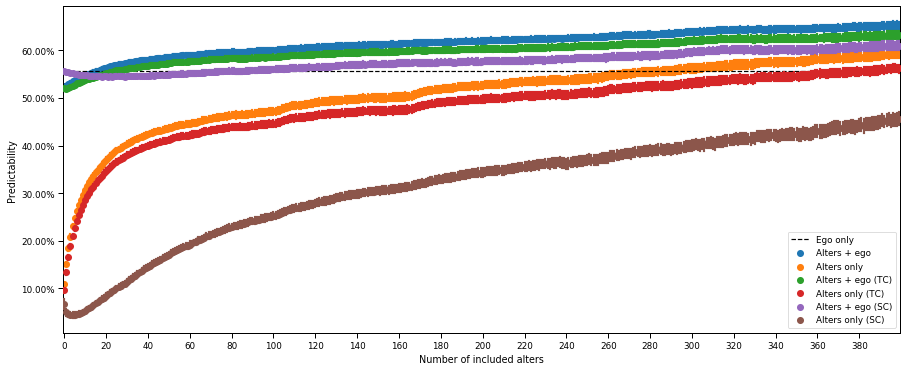

In [101]:
FastMeetup.num_point_plot('predictability', threshold=400, l=15, w=6, mode='paper', control=True)

From the view of the plots above, the real alters provided more information than either control (in terms of predictability, the orange one is always higher than red one and brown one). 

Although there was a decrease in entropy as more control alters were added, the control cross entropy remained above the real cross entropy and the control predictability remained below the real predictability.

We also observed that, for a single alter, the temporal control had a lower cross entropy than the social control and therefore temporal effects (*the time-order of visited sequence*) is **not so important as** the social effects (*who your meetupers are*). This demonstrates that useful predictive information is encoded in real meetupers' ties, beyond that expected from the structure of temporal human trajectories.

## Predictability vs ego and alters' information

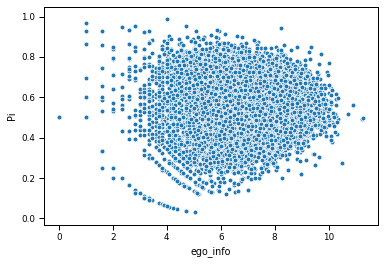

In [25]:
sns.scatterplot(x='ego_info', y='Pi', data=FastMeetup.ego_stats)

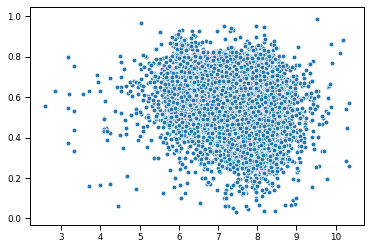

In [29]:
sns.scatterplot(x=FastMeetup.user_stats.groupby('userid_x')['alter_info'].mean().tolist(), y=FastMeetup.ego_stats['Pi'].tolist())

Unfortunately, there is no clear pattern.

## Number of meetup ties of alter vs predictability

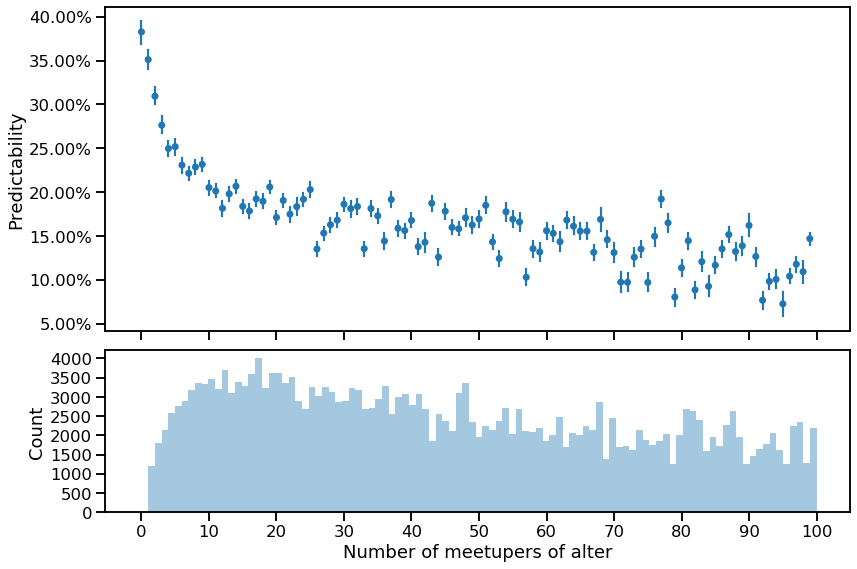

In [66]:
FastMeetup.paper_interaction(threshold=100, interval=10, n_bins=100, mode='paper')